In [50]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint

In [2]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#from keras.callbacks import EarlyS
from keras.callbacks import EarlyStopping

In [4]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [5]:
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

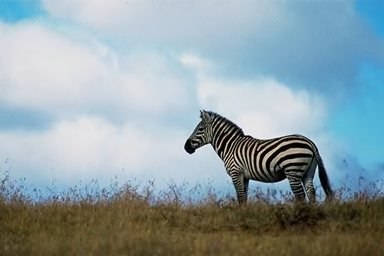

In [6]:
real_image_path = 'C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Au\\Au_ani_00001.jpg'
Image.open(real_image_path)

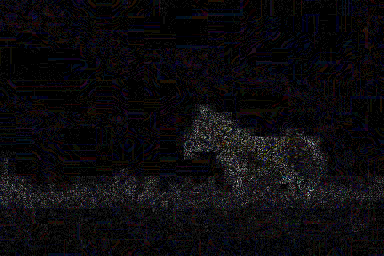

In [7]:
convert_to_ela_image(real_image_path, 90)

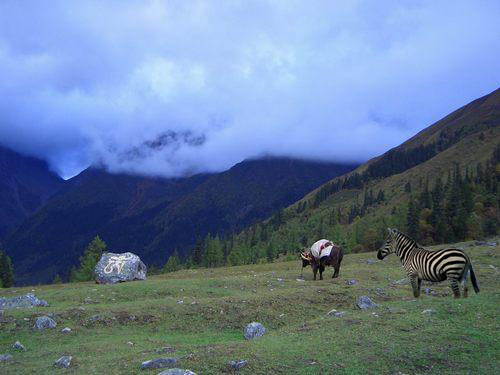

In [8]:
fake_image_path = 'C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Tp\\Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
Image.open(fake_image_path)

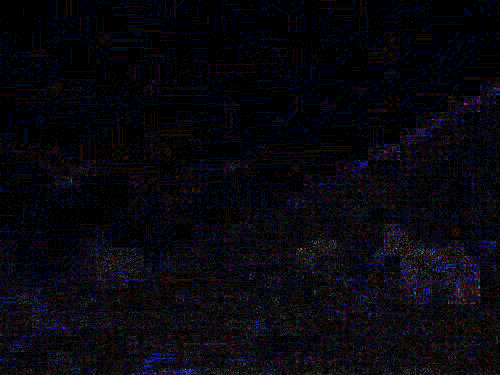

In [9]:
convert_to_ela_image(fake_image_path, 90)

DENOISING

In [10]:
# Color-image denoising
from skimage.restoration import (denoise_wavelet,estimate_sigma)
from skimage.util import random_noise
# from sklearn.metrics import peak_signal_noise_ratio
import skimage.io

DENOISING REAL IMAGE

In [11]:
img_r=skimage.io.imread('C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Au\\Au_ani_00001.jpg')
img_r=skimage.img_as_float(img_r) #converting image as float

#sigma=0.35 #noise
#imgn=random_noise(img,var=sigma**2) # adding noise

sigma_est=estimate_sigma(img_r,multichannel=True,average_sigmas=True)  #Noise estimation

# Denoising using Bayes
img_bayes=denoise_wavelet(img_r,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


#Denoising using Visushrink
img_visushrink=denoise_wavelet(img_r,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
                               wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)





C:\Users\Asus\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [12]:
import cv2
psnr_noisy = cv2.PSNR(img_r,img_r)
psnr_noisy

361.20199909921956

In [13]:
psnr_bayes = cv2.PSNR(img_r,img_bayes)
psnr_bayes

124.60573219905689

In [14]:
psnr_visu = cv2.PSNR(img_r,img_visushrink)
psnr_bayes

124.60573219905689

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


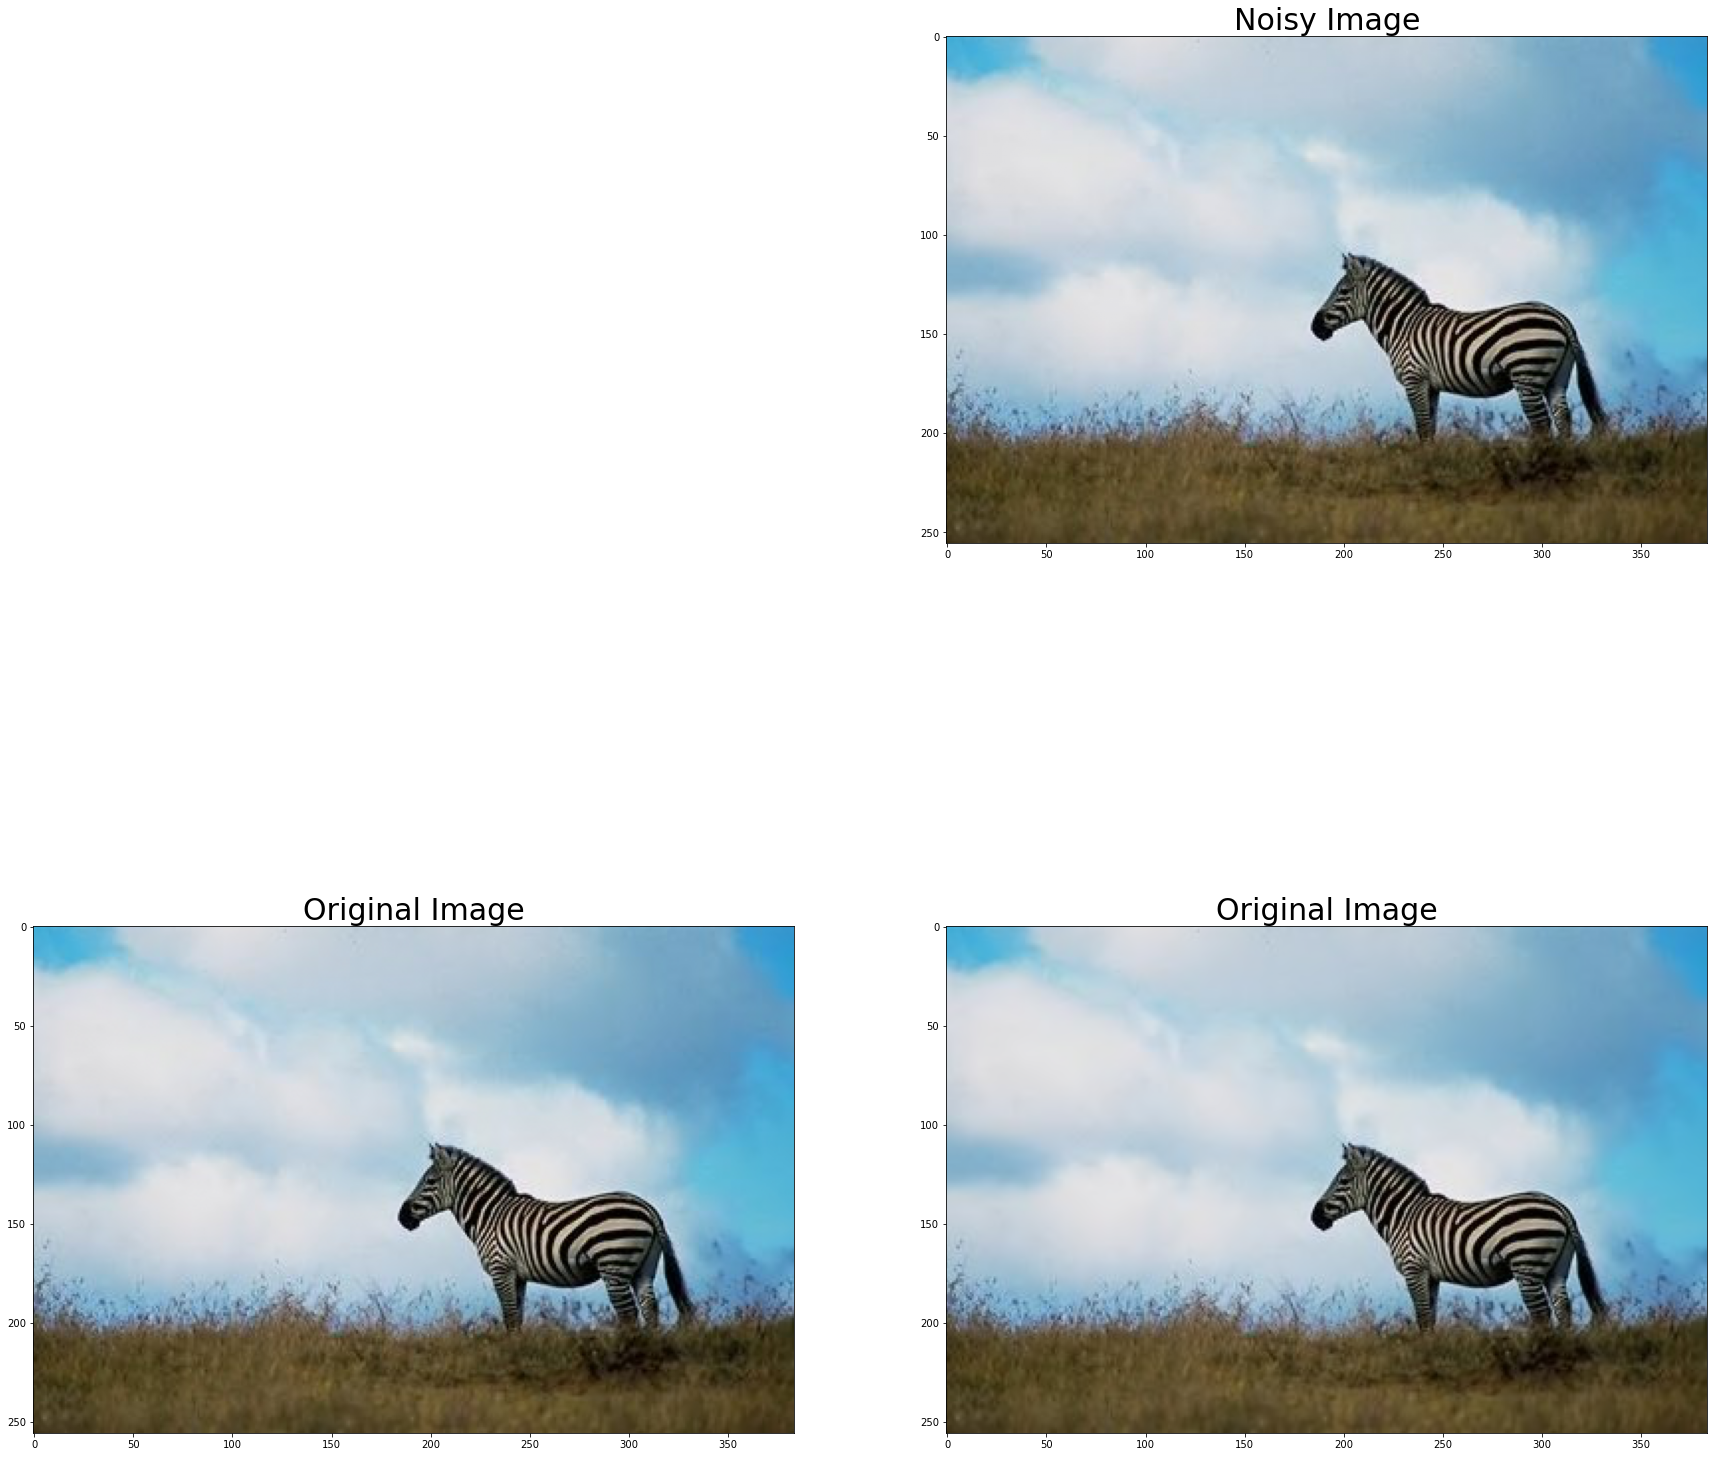

In [15]:
# Plotting images
plt.figure(figsize=(30,30))

# plt.subplot(2,2,1)
# plt.imshow(img,cmap=plt.cm.gray)
# plt.title('Original Image',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(img_r,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.show()

In [16]:
print('PSNR[Original vs. Noisy Image]', psnr_noisy)
print('PSNR[Original vs. Denoised(VisuShrink)]', psnr_visu)
print('PSNR[Original vs. Denoised(Bayes)]', psnr_bayes)


PSNR[Original vs. Noisy Image] 361.20199909921956
PSNR[Original vs. Denoised(VisuShrink)] 100.08271190521796
PSNR[Original vs. Denoised(Bayes)] 124.60573219905689


DENOISING FAKE IMAGE

In [17]:
img_f=skimage.io.imread('C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Tp\\Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg')
img_f=skimage.img_as_float(img_f) #converting image as float

sigma_est=estimate_sigma(img_f,multichannel=True,average_sigmas=True)  #Noise estimation

# Denoising using Bayes
img_bayes=denoise_wavelet(img_f,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


#Denoising using Visushrink
img_visushrink=denoise_wavelet(img_f,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
                               wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)




In [18]:
import cv2
psnr_noisy = cv2.PSNR(img_f,img_f)
psnr_noisy

361.20199909921956

In [19]:
psnr_bayes = cv2.PSNR(img_f,img_bayes)
psnr_bayes

120.58626094108678

In [20]:
psnr_visu = cv2.PSNR(img_f,img_visushrink)
psnr_bayes

120.58626094108678

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


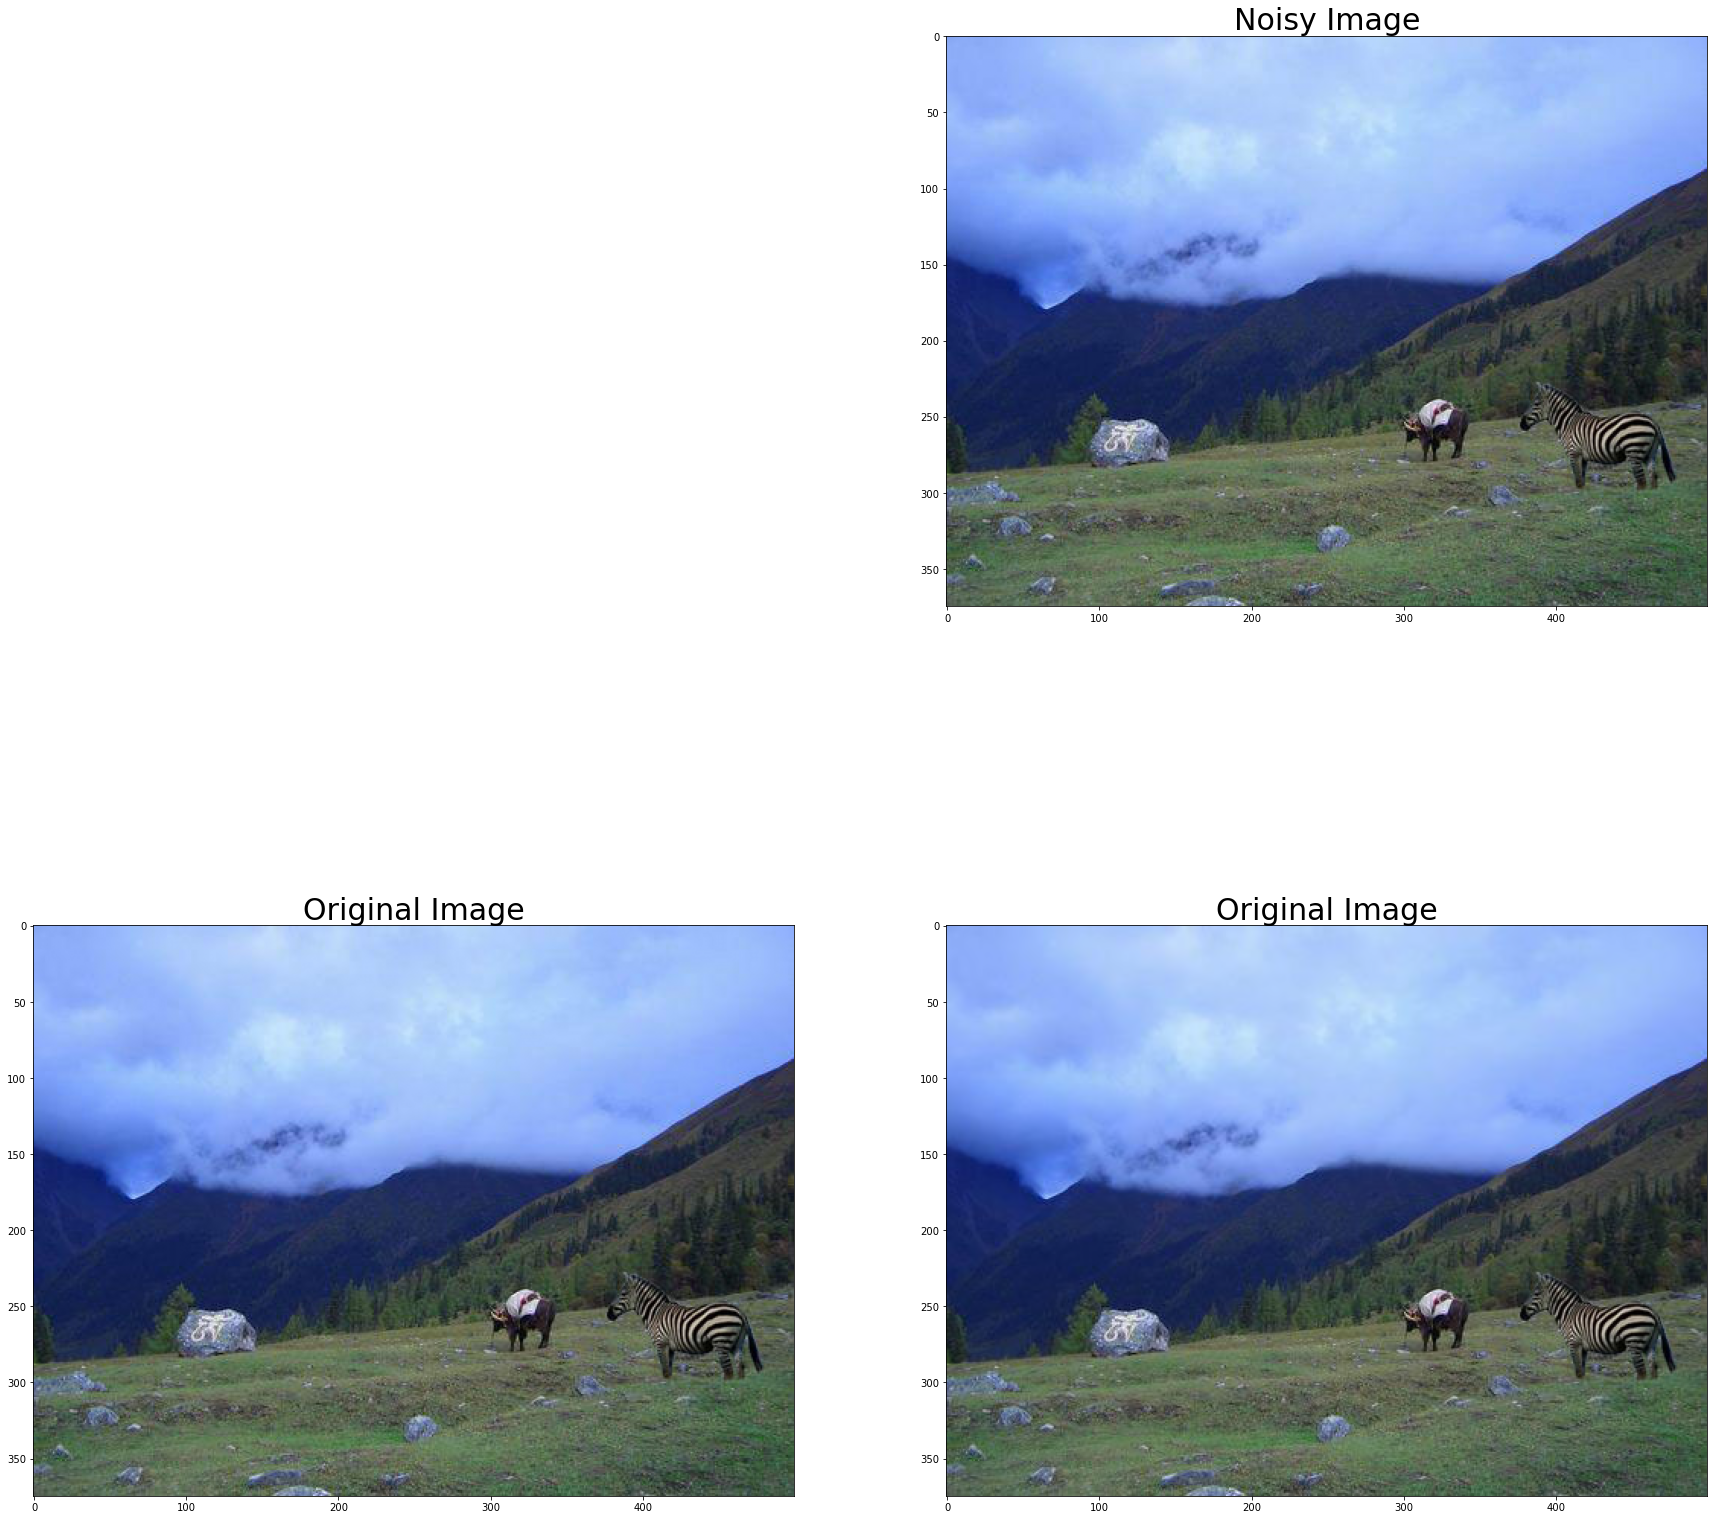

In [21]:
# Plotting images
plt.figure(figsize=(30,30))

# plt.subplot(2,2,1)
# plt.imshow(img,cmap=plt.cm.gray)
# plt.title('Original Image',fontsize=30)

plt.subplot(2,2,2)
plt.imshow(img_f,cmap=plt.cm.gray)
plt.title('Noisy Image',fontsize=30)

plt.subplot(2,2,3)
plt.imshow(img_bayes,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.subplot(2,2,4)
plt.imshow(img_visushrink,cmap=plt.cm.gray)
plt.title('Original Image',fontsize=30)

plt.show()

In [22]:
print('PSNR[Original vs. Noisy Image]', psnr_noisy)
print('PSNR[Original vs. Denoised(VisuShrink)]', psnr_visu)
print('PSNR[Original vs. Denoised(Bayes)]', psnr_bayes)

PSNR[Original vs. Noisy Image] 361.20199909921956
PSNR[Original vs. Denoised(VisuShrink)] 97.24783471476827
PSNR[Original vs. Denoised(Bayes)] 120.58626094108678


ELA DENOISING FUNCTION FOR DATASET

In [23]:
import cv2
import numpy as np
from PIL import Image

In [24]:
def ela_denoise_img(path, quality):
    #denoise
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    img=skimage.img_as_float(image) #converting image as float


    sigma_est=estimate_sigma(img,multichannel=True,average_sigmas=True)  #Noise estimation

    # Denoising using Bayes
    img_bayes=denoise_wavelet(img,method='BayesShrink',mode='soft',wavelet_levels=3,
                          wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)


    #Denoising using Visushrink
    img_visushrink=denoise_wavelet(img,method='VisuShrink',mode='soft',sigma=sigma_est/3,wavelet_levels=5,
    wavelet='coif5',multichannel=True,convert2ycbcr=True,rescale_sigma=True)
    
    from keras.preprocessing.image import array_to_img
    img_denoised=array_to_img(img_bayes)
    
    #ela 
    ela_image = ImageChops.difference(img_denoised, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    return ela_image

In [25]:
image_size = (128, 128)
def prepare_image(image_path):
    return np.array(ela_denoise_img(image_path, 90).resize(image_size)).flatten() / 255.0

In [26]:
X = [] # ELA and DENOISE converted images
Y = [] # 0 for fake, 1 for real

In [27]:
import random
path = 'C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Au\\'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

random.shuffle(X)
X = X[:2100]
Y = Y[:2100]
print(len(X), len(Y))

C:\Users\Asus\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Processing 500 images
Processing 1000 images
Processing 1500 images
Processing 2000 images


C:\Users\Asus\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  warnings.warn(


Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
Processing 4500 images
Processing 5000 images
Processing 5500 images
Processing 6000 images
Processing 6500 images
Processing 7000 images
2100 2100


In [28]:
path = 'C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Tp\\'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
            if len(Y) % 500 == 0:
                print(f'Processing {len(Y)} images')

print(len(X), len(Y))

Processing 2500 images
Processing 3000 images
Processing 3500 images
Processing 4000 images
4164 4164


In [29]:
from sklearn.utils import shuffle
shuffle(X,Y)

[[array([0.00784314, 0.00784314, 0.01960784, ..., 0.01176471, 0.00392157,
         0.01176471]),
  array([0.0627451 , 0.04313725, 0.        , ..., 0.04313725, 0.        ,
         0.        ]),
  array([0.13333333, 0.10588235, 0.10196078, ..., 0.0627451 , 0.0627451 ,
         0.05882353]),
  array([0.2       , 0.32941176, 0.2       , ..., 0.1254902 , 0.1254902 ,
         0.0745098 ]),
  array([0.00784314, 0.01176471, 0.01176471, ..., 0.00392157, 0.00392157,
         0.00392157]),
  array([0.10196078, 0.07058824, 0.0627451 , ..., 0.10196078, 0.0627451 ,
         0.0745098 ]),
  array([0.10196078, 0.10980392, 0.12156863, ..., 0.16862745, 0.16078431,
         0.14901961]),
  array([0.07058824, 0.03137255, 0.03529412, ..., 0.03137255, 0.05490196,
         0.02352941]),
  array([0.25098039, 0.23137255, 0.25098039, ..., 0.23921569, 0.18431373,
         0.18431373]),
  array([0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
         0.        ]),
  array([0.18039216, 0.1215686

In [30]:
import numpy as np
X= np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [31]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

3331 3331
833 833


In [32]:
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(128, 128, 3))
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(2, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
# ...

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [33]:
#datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,samplewise_std_normalization=False,zca_whitening=False,rotation_range = 30,zoom_range = 0.2,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip = True,vertical_flip=False)  
datagen =ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    )

datagen.fit(X_train)



In [34]:
epochs = 10
batch_size = 32

In [35]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [36]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [51]:
save_ck=callbacks.ModelCheckpoint('my_model2(b).hdf5', save_best_only= True, monitors='val_loss', mode='min')

NameError: name 'callbacks' is not defined

In [38]:
history = model.fit(X_train,
                 Y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                validation_data = (X_val, Y_val),
                callbacks = [early_stopping])

Epoch 1/10
105/105 [==============================] - 823s 8s/step - loss: 0.5635 - accuracy: 0.7294 - val_loss: 0.4096 - val_accuracy: 0.8427
Epoch 2/10
105/105 [==============================] - 799s 8s/step - loss: 0.4455 - accuracy: 0.8203 - val_loss: 0.4696 - val_accuracy: 0.7899
Epoch 3/10
105/105 [==============================] - 799s 8s/step - loss: 0.4202 - accuracy: 0.8366 - val_loss: 0.4850 - val_accuracy: 0.7875
Epoch 4/10
105/105 [==============================] - 788s 8s/step - loss: 0.3943 - accuracy: 0.8434 - val_loss: 0.3501 - val_accuracy: 0.8679
Epoch 5/10
105/105 [==============================] - 947s 9s/step - loss: 0.3450 - accuracy: 0.8691 - val_loss: 0.3397 - val_accuracy: 0.8788
Epoch 6/10
105/105 [==============================] - 909s 9s/step - loss: 0.3276 - accuracy: 0.8696 - val_loss: 0.3083 - val_accuracy: 0.8776
Epoch 7/10
105/105 [==============================] - 911s 9s/step - loss: 0.3104 - accuracy: 0.8795 - val_loss: 0.3758 - val_accuracy: 0.8752

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model,'my_model_VGG16(a).hdf5')

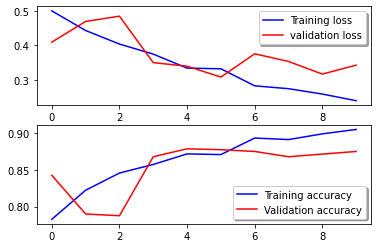

In [40]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [41]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

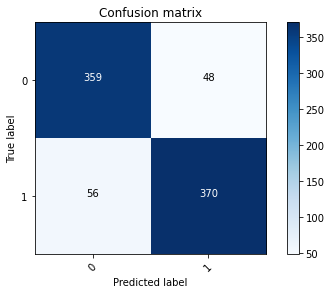

In [42]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))


In [43]:
class_names = ['fake', 'real']

In [44]:
real_image_path = 'C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Au\\Au_ani_00001.jpg'
image = prepare_image(real_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

C:\Users\Asus\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Class: real Confidence: 100.00


In [45]:
fake_image_path = 'C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Tp\\Tp_D_NRN_S_N_ani10171_ani00001_12458.jpg'
image = prepare_image(fake_image_path)
image = image.reshape(-1, 128, 128, 3)
y_pred = model.predict(image)
y_pred_class = np.argmax(y_pred, axis = 1)[0]
print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

Class: fake Confidence: 69.53


In [53]:
fake_image = os.listdir('C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Tp\\')
correct = 0
total = 0
for file_name in fake_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        fake_image_path = os.path.join('C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Tp\\', file_name)
        image = prepare_image(fake_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total += 1
        if y_pred_class == 0:
            correct += 1
#             print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

In [54]:
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 2064, Correct: 1925, Acc: 93.26550387596899


In [55]:
real_image = os.listdir('C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Au\\')
correct_r = 0
total_r = 0
for file_name in real_image:
    if file_name.endswith('jpg') or filename.endswith('png'):
        real_image_path = os.path.join('C:\\Users\\Asus\\Desktop\\BDA SEM 2\\IMAGE FORGERY DETECTION PROJECT\\CASIA DATASET\\CASIA2\\Au\\', file_name)
        image = prepare_image(real_image_path)
        image = image.reshape(-1, 128, 128, 3)
        y_pred = model.predict(image)
        y_pred_class = np.argmax(y_pred, axis = 1)[0]
        total_r += 1
        if y_pred_class == 1:
            correct_r += 1
#             print(f'Class: {class_names[y_pred_class]} Confidence: {np.amax(y_pred) * 100:0.2f}')

C:\Users\Asus\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41487
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41988
  warnings.warn(


In [56]:
correct += correct_r
total += total_r
print(f'Total: {total_r}, Correct: {correct_r}, Acc: {correct_r / total_r * 100.0}')
print(f'Total: {total}, Correct: {correct}, Acc: {correct / total * 100.0}')

Total: 7354, Correct: 6511, Acc: 88.53685069350014
Total: 9418, Correct: 8436, Acc: 89.57315778296878
